<center><h1 style="color:maroon">Model Tuning</h1>
    <img src="figures/04-model_tuning.jpeg" style="width:1300px;">
    <h3><span style="color: #045F5F">Data Science & Machine Learning for Planet Earth Lecture Series</span></h3><h6><i> by Cédric M. John <span style="size:6pts">(2022)</span></i></h6></center>

## Plan for today's Lecture 🗓 

* Bias/Variance tradeoff
* Learning Curve
* Model Selection
* Regularizing models
* Model Tuning
* Support Vector Machine


## Intended learning outcomes 👩‍🎓

* Choose a fit for purpose model
* Regularize to avoid overfitting
* Use SVR and SVC for respectively regression and classification

# "No Free Lunch" Theorem
<br>

<center><img src="figures/DALLE_freelunch.png" style="width:900px;">
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: <i>Photo of a beautifully colored greek lunch with olives, mousaka and various other elements set on a white and blue checkered table cloth, sunny bright lighting</i>.</center>

# Data used today
We are back to the <a href="https://www.kaggle.com/aungpyaeap/fish-market">Kaggle fish market dataset</a>.
<img src="figures/fish_dataset.png" style="width:1300px;">

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Some packages we will use later to plot...
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('data/fish_no_pikes.csv')
df.head()

#  Bias vs Variance 
<img src="figures/variance_tradeoff_bullseye.png" style="width:900px;">
<a href="http://scott.fortmann-roe.com/docs/BiasVariance.html">Scott-Fortmann, 2012</a><br>

# The Bias / Variance tradeoff
For a model to generalize there will be a tradeoff between **bias** and **variance**.
<img src="figures/over_under_bias_variance.png" style="width:1300px">
<a href="https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229">Singh, 2018</a><br>

* **Bias (Underfitting)**: The inability for an algorithm to learn the patterns within a dataset.
* **Variance (Overfitting)**: The algorithm generates an overly complex relationship when modelling patterns within a dataset.

## 🐟 Testing with our fish dataset

In [ ]:
from utils import polynomial_regression
polynomial_regression(data=df,degrees=1)

## No Free Lunch Theorem

Some models **oversimplify**, while others **overcomplicate** a relationship between features and target.<br>

It's up to us data scientists to make **assumptions** about the data and evaluate reasonable models accordingly.<br>

**There is no one size fits all model**, this is known as the **No Free Lunch Theorem**.

## The Learning Curves
We can use learning curves to diagnose three aspects of model behaviour on the dataset:
* Underfitting
* Overfitting
* Whether the model has sufficient data to learn the patterns of the dataset


### Concept
Increasing the size of the training set can affect the training and validation scores.
![lc](figures/learning_curves_transposed.png)
<p><a href="https://www.dataquest.io/blog/learning-curves-machine-learning/">Olteanu, 2018</a></p>


### Reading  the curves
As the training size increases:
* The training score will decrease
* The testing score will increase
* The curves typically (but not always!) demonstrate convergence
![lc1](figures/learning_curve_1.png)
<p><a href="https://www.dataquest.io/blog/learning-curves-machine-learning/">Olteanu, 2018</a></p>

In [ ]:
lc_train, lc_test = train_test_split(df, train_size=.8, random_state=3)
val_score = []
train_score = []
fig, ax = plt.subplots(1,1, figsize=(10,8))
for nb_samples in range(1,100):
    data = lc_train.iloc[:nb_samples]
    poly_tr = PolynomialFeatures(degree=2).fit(data.drop(columns=['Weight', 'Species']))
    poly = poly_tr.transform(data.drop(columns=['Weight', 'Species']))
    lin_model = LinearRegression().fit(poly, data.Weight)
    y_pred = lin_model.predict(poly)
    y_test_pred = lin_model.predict(poly_tr.transform(lc_test.drop(columns=['Weight', 'Species'])))

    train_score.append(np.sqrt(mean_squared_error(data.Weight, y_pred)))
    val_score.append(np.sqrt(mean_squared_error(lc_test.Weight, y_test_pred)))
                     
ax.plot(train_score, label='Training RMSE')
ax.plot(val_score, label='Testing RMSE')
ax.set_xlabel('Number of training samples', size = 14)
ax.set_ylabel('RMSE', size = 14)
ax.legend();
    


<h3 id="The-Bias-Variance-Tradeoff">The Bias-Variance Tradeoff</h3><p>One of the most important concepts in Data science!</p>


 Measuring the error on an unseen **Test set**:<br>
<img src="figures/biasvariancetradeoff.png" style="width:1300px;">
$$\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$
📚 <a href="https://hastie.su.domains/ElemStatLearn/">Hastie et al, 2009 (Elements of Statistical Learning)</a>

Best model complexity is the one reducing the **Total Error** on a unseen dataset
<img src="figures/model_complexity_error_training_test.jpg" style="width:1300px;">
📚 <a href="https://hastie.su.domains/ElemStatLearn/">Hastie et al, 2009 (Elements of Statistical Learning)</a>

# Model Selection
<br>

<center><img src="figures/DALLE_selection.png" style="width:900px;">
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: <i>A large wooden cheeseboard with five types of cheese, various small decorative flowers and tomatoes, gurken, pickled onions, and a cheese knife with a</i>.</center>

# What data to use to select the right model?

* Do NOT use the **test set**: would lead to overfitting
* Instead use a *Validation Set*
<p>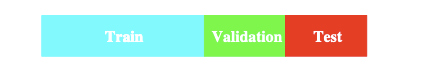</p>



* Even better: <strong>cross-validate</strong> instead of a using single holdout val set cross validate with the train set


### Model complexity vs dataset size (rule of thumb 👍)

* More than 100,000 datapoints: Parametric models (SGD, Neural Nets)
* Less than 100,000 datapoints: Non-parametric models (KNN, SVM, Decision Trees)


<img src="figures/ml_cheat_sheet.png" style="width:1500px;">
<a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html"><code>sklearn</code> algorithm cheat sheet</a>


### What to do if the model overfits?



<blockquote><p><em>Simplify</em> your model <em>relatively</em> to your data</p>
</blockquote>
<ul>
<li>Choose a simpler model</li>
<li>Get more observations</li>
<li>Feature selection (manual or <a href="https://scikit-learn.org/stable/modules/feature_selection.html">automated</a>)</li>
<li>Dimensionality reduction (Unsupervised Learning)</li>
<li>Early stopping (Deep Learning)</li>
<li><strong>Regularization</strong> of your Loss function</li>
</ul>


# Feature Selection
<br>


<img align="center" src="./figures/feature_selection.png" width="800px"/>

Feature selection is the process of eliminating non-informative features. 

### The curse of dimensionality
Not observing enough data to support a meaningful relationship.
<img align="center" src="./figures/curse_of_dimensionality.png" width="800px"/>
<a href="https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/">Source</a>



<img align="center" src="figures/curse_of_dimensionality_boxes.png" width="1200px"/>
As the number of features or dimensions grows, the amount of data we need to generalise accurately grows **exponentially** e.g $5^1$, $5^2$, $5^3$, $5^n$
<a href="https://www.freecodecamp.org/news/the-curse-of-dimensionality-how-we-can-save-big-data-from-itself-d9fa0f872335/">Source</a>


## Feature correlation
One selection technique is to remove one (or more) of  features that are highly correlated to each other.
* High correlation = redundant information 

### 🖥 Pearson Correlation

In [ ]:
corr_data = X_train.copy()
corr_data['target'] = y_train
corr = corr_data.corr()
corr

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,8))

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "seismic",ax=ax, annot=corr);

## Model with all features

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 

scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10)

scores.mean()

## Model with only best features

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 

scores = cross_val_score(LinearRegression(), X_train[['Length3', 'Width', 'Height']], y_train, cv=10)

scores.mean()

Colinearities are not too high in this dataset, but if we had seen high colinearities we could have done the following:
* Drop one of the two variables that are strongly co-linear
* Drop more than one variable

# Feature Permutation 
Feature permutation is a second feature selection algorithm that evaluates the importance of each feature in predicting the target.
* Trains and records the test score of a base model containing all features 
* Randomly shuffles (permutation) <span style="color:blue">**one**</span> feature within the test set 
* Records new score on shuffled test set 
* Compares the new score to the original score 
* Repeat for each feature 
👉 <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html">Sklearn's <code>permutation_importance</code> documentation</a>


👉 If the score drops when a feature is shuffled, it is considered important.

### 💻 Feature permutation in Sklearn

This time, let's see if turning this problem into a classification problem works better:

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(data.Species[X_train.index])

y_train_cat = encoder.transform(data.Species[X_train.index])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

model = LogisticRegression(max_iter=3000)

model.fit(X_train, y_train_cat)

In [ ]:
permutation_score = permutation_importance(model, X_train, y_train_cat, n_repeats=10) # Perform Permutation

In [ ]:
importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

## Model with all features

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=3000)

scores = cross_val_score(base_model, X_train, y_train_cat, cv=10)

scores.mean()



## Model with best features

In [ ]:
from sklearn.model_selection import cross_val_score

X_small = X_train[["Length3","Length2", "Height"]] # Keep strong features

final_model = LogisticRegression(max_iter=5000)

scores = cross_val_score(final_model, X_small, y_train_cat, cv=10)

scores.mean()



### Reducing Complexity
The most simple solution is normally the best solution🔪
Reducing the number of features makes the model:
* More interpretable 
* Faster to train 
* Easier to implement and maintain in production 

# Regularization


Regularization means adding a **penalty term** to the Loss that **increases** with $\beta$
$$\text{Regularized Loss} = Loss(X,y, \beta) + Penalty(\beta)$$


👉 Penalizes large values for $\beta_i$<br>
👉 Forces model to shrink certain coefficients or even select less features<br>
👉 Prevents overfitting <br>
$$\hat{y} =  \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_1^3 + ... $$


Two famous Regularization penalties:<br><br>
**Lasso** (L1)<br>
$$L1 = Loss  + \alpha \sum_{i=1}^n |\beta_i|$$ <br>
**Ridge** (L2)<br>
$$L2 = Loss + \alpha \sum_{i=1}^n \beta_i^2$$

Introduces the new hyper-parameter $\alpha$:
* Dictates **how much** the model is **regularized**
* Large $\alpha$ force **model complexity and variance to decrease**, but **bias increases**
* Notice $\sum$ starts from $i=1$, i.e. intercept coefficient is not penalized


⚠️   Always **scale** your feature before regularization to penalize each $\beta_i$ fairly

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression

def test_reg_coefs(data=lc_train):
    X = data[['Length1','Length2','Length3', 'Height']]

    poly_tr = PolynomialFeatures(degree=2).fit(X)
    X = pd.DataFrame(poly_tr.transform(X))
    X = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

    # The target is the weight of a fish
    Y = data[['Weight']] 

    linreg = LinearRegression().fit(X, Y)
    ridge = Ridge(alpha=1.5, max_iter=2000).fit(X, Y)
    lasso = Lasso(alpha=1.5, max_iter=2000).fit(X, Y)

    coefs = pd.DataFrame({
        "coef_linreg": pd.Series(linreg.coef_[0], index = X.columns),
        "coef_ridge": pd.Series(ridge.coef_[0], index = X.columns),
        "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

    return coefs\
        .applymap(lambda x: int(x))\
        .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

In [ ]:
test_reg_coefs()

# Model Tuning: Finding the best Hyperparameters
<br>

<center><img src="figures/DALLE_tuning.png" style="width:900px;">
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: <i>A jazz band playing a happy tune on their saxophone in the lively streets of New Orleans, vivid colors</i>.</center>

### The grid search method
Explores different hyperparam value combinations to find those optimizing performance
<img src="figures/grid_search.png" style="width:600px;">
<a href="https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35">Stalfort, 2019</a>

* Also applied using a *validation set* (never use test set for model tuning!)
* Select which grid of values of hyper-parameters to try out
* For each combinations of values, measure your performance on the *validation set*
* Select hyperparams that produce the best performance

**🔥 Grid Search CV**<br>
<img src="figures/full_workflow_validation.png" style="width:1200px;">
<a href="https://stats.stackexchange.com/questions/424477/how-to-make-train-test-split-with-given-class-weights">StackExchange, 2019</a>

### Sklearn  <code>GridSearchCV</code> 🚀

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Species', 'Weight'])
y = data[['Weight']]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Instanciate model
model = Ridge()

# Hyperparameter Grid
grid = {'alpha': [0.01, 0.1, 1], 
        'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg']}

# Instanciate Grid Search
search = GridSearchCV(model, grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 

# Fit data to Grid Search
search.fit(X_train,y_train);

In [ ]:
# Best score
search.best_score_

In [ ]:
# Best Params
search.best_params_

In [ ]:
# Best estimator
search.best_estimator_


<p>👎 Limitations of Grid Search:</p>
<ul>
<li>Computationally costly</li>
<li>The optimal hyperparameter value can be missed</li>
<li>Can overfit hyperparameters to the training set if too many combinations are tried out for too small a dataset</li>
</ul>


## Random Search

Randomly explore hyperparameter values from:
* A hyperparameter space to randomly sample from
* The specified number of samples to be tested<br>
<img src="figures/grid_search2.png" style="width:1200px;">
<a href="https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35">Stalfort, 2019</a>


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

# Instanciate model
model = Ridge()

# Hyperparameter Grid
grid = {'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg'], 'alpha': stats.loguniform(0.01,1)}

# Instanciate Grid Search
search = RandomizedSearchCV(model, grid, 
                            scoring='r2',
                            n_iter=100,  # number of draws
                            cv=5, n_jobs=-1)

# Fit data to Grid Search
search.fit(X_train, y_train)
search.best_estimator_

### Using a probability distribution in RandomSearch
Can be generated with <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">scipy.stats.distributions</a>


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

dist = stats.norm(10, 2) # if you have a best guess (say: 10)

dist = stats.randint(1,100) # if you have no idea
dist = stats.uniform(1, 100) # same

dist = stats.loguniform(0.01, 1) # Coarse grain search

r = dist.rvs(size=10000) # Random draws
plt.hist(r);

### Limitations of GridSearch and RandomizedSearch:

* Both algorithms are not tracking the history of optimization 📜

* Choice of next set of parameter is random 🎲 

* Evaluation of the loss function is costly 💸

## Bayesian Optimization
<p><img src="figures/bayes_theorem_visual.jpeg" style="width:600px;"></p>
<a href="https://luminousmen.com/post/data-science-bayes-theorem">Source: Bayes Theorem in Data Science</a>

### Principle of Bayesian Optimization:

* Build a surragate function that is quick to evaluate (prior) 🎭

* Select the next set of hyperparameters based on the surrogate function, evaluate them on the loss function ✅

* Update the surroage function (posterior) 🕰️

<img src="figures/bayesOpt1.png" style="width:800">
<a href="https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f">Koehrsen, 2018</a>

<img src="figures/bayesOpt2.png" style="width:800">
<a href="https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f">Koehrsen, 2018</a>

## Bayesian Optimization Implementation
We can use BayesSearch <code>skopt</code> do do Bayesian Optimization:

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

X = data.drop(columns=['Species', 'Weight'])
y = data[['Weight']]
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=.3, random_state=0)

#⚠️ Polynomial Transformation first ⚠️
poly_tr = PolynomialFeatures(degree=3).fit(X_train)
X_train = poly_tr.transform(X_train)
X_test = poly_tr.transform(X_test)
    
    
#⚠️ Data must be centered around its mean before applying PCA ⚠️
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    Lasso(max_iter=2000),
    {
        'alpha': Real(0.1, 10, prior='log-uniform'),
        'max_iter': [3000, 5000]
    },
    n_iter=32,
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

In [ ]:
from skopt.plots import plot_objective, plot_histogram

_ = plot_objective(opt.optimizer_results_[0],
                   dimensions=["alpha", "max_iter"],
                   n_minimum_search=int(1e8), size=8)
plt.show()

# Support Vector Machines
<br>

<center><img src="figures/DALLE_svm.png" style="width:900px;">
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: <i>Two Doric columns supporting a temple in a soft green light, digital art</i>.</center>

### What is the optimal decision boundary for this classification?
<img src="figures/SVM_planes.png" style="width:1200px">
<a href="https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c">Ippoloto, 2019</a>
<p>Infinite number of potential decision boundaries that separate the classes ("hyperplanes")</p>


<img src="figures/SVM_margin.png" style="width:1200px;">
<a href="https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c">Ippoloto, 2019</a>

* The hyperplane that generalizes best to unseen data is the one that is furthest from all the points (maximizes the **margin**)
* The points on the margin boundary are called **support vectors**
* Finding them is a convex optimization problem (one single best solution)
* **Maximum Margin Classifier** algorithm


* Max Margin is super sensitive to outliers
* It **overfits** to the training data

For **generalization** purpose, we may want to allow some points to be **inside** the margin, or even **on the other side** of the decision boundary:<br>
<img src="figures/1_M_3iYollNTlz0PVn5udCBQ.png" style="width:900px;">
<a href="https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe">Mishra, 2019</a>

### Soft margin classifier
Allows a few points to be misclassified but with a **penalty ($\xi$)** for how "far" they lie on the wrong side of the margin


The **Hinge Loss** is the penalty applied to each point on the wrong side<br>
* The deeper a point lies within the margin, the higher the loss
* The penalty is linear, like MAE <br>
<img src="figures/1_M_3iYollNTlz0PVn5udCBQ.png" style="width:800px;">
<a href="https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe">Mishra, 2019</a>

<img src="figures/hinge_loss_.png" style="width:1300px;">
<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

### Regulariation hyperparameter <code>C</code>
Stength of the penalty applied on points being on the wrong side of the margin
* The higher <code>C</code>, the stricter the margin
* A "maximum margin classifier" has <code>C</code> = $+ \infty$
* The smaller <code>C</code>, the softer the margin, the more it is ***regularized***
* C similar to $1/ \alpha$ in Ridge 
<img src="figures/svm_regularization.png" style="width:1200px;">
<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>


<p>💻 sklearn implementation</p>


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=10)

In [ ]:
# equivalent but with SGD solver
from sklearn.linear_model import SGDClassifier
svc_bis = SGDClassifier(loss='hinge', penalty='l2', alpha=1/10)

⚠️ Warning: All support vector models requires **scaling**
<img src="figures/svm_scaling.png" style="width:1800px;">
<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

# SVM 'kernels'

<img src="figures/SVM_nonlin.png" style="width:800px">

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

## We can create more features to separate this data:

<img src="figures/SVM_kernel1.png" style="width:1300px">

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

☝️ Creates new features - curse of dimensionality!

🌽 Instead, we can use a mathematical <strong style="color:teal">'kernel'</strong> to simulate new features

# The kernel-trick

📏 Measure a distance pair-wise between each sample and use this to simulate creating new features

* ***Linear kernel function*** for linear datasets (the best for high-dimensional datasets - speed!)<br>$F(x, xj) = sum( x.xj)$

* ***Polynomial kernel functions*** (example of previous slide with $X^3$)<br> $F(x, xj) = (x.xj+1)^d$

* ***Gaussian Radial Basis function kernel (RBF)*** (one of the favourite kernels for non-linear datasets)<br> $F(x, xj) = \exp(-\gamma * ||x - xj||^2)$

* ***Sigmoid kernel function*** <br> $F(x, xj) = tanh(αxay + c)$<br><br><a href="https://dataaspirant.com/svm-kernels/">Good reference on SVMs with kernels</a>

## SVM-Regressors 

Reverse the objective:
* **Classification**: fit the largest possible *street* **between** two classes
* **Regression**: fit as many points as possible **within** the *street*
* Width of the street controlled by an additional hyperparam $\epsilon$
<img src="figures/svm_regressor.png" style="width:1200px">
<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

In [ ]:
from sklearn.svm import SVR
regressor = SVR(epsilon=1, kernel='linear')

# Suggested Resources

## 📺 Videos 
#### Short videos from my Undegraduate Machine Learning Classes:
* 📼 <a href="https://youtu.be/8mNPHGmXS5Q?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Support Vector Machines</a>

## 📚 Further Reading 
* 📖 <a href="https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47">Support Vector Machine — Introduction to Machine Learning Algorithms</a> by Rohith Gandhi, 2018
* 📖 <a href="https://www.cs.ox.ac.uk/people/nando.defreitas/publications/BayesOptLoop.pdf">Taking the Human Out of the Loop: A Review of Bayesian Optimization</a> by Shariari et al
* 📖 <a href="https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f">A Conceptual Explanation of Bayesian Hyperparameter Optimization for Machine Learning</a> by Will Koehrsen